Agent position: (5, 1)
Target position: (8, 14)


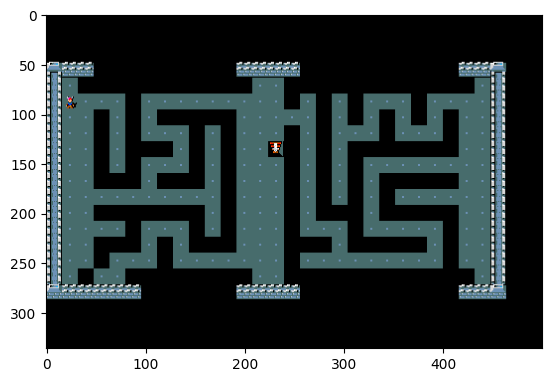

In [41]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import *
from genetic_new import *

#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
SEED = 1234567890
env.seed(SEED)
state = env.reset()

coordinates = [500, 500]

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

#game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)


In [16]:
population_size = 1000 #number of possible created path in our dictionary
generations = 2000
mutation_rate = 0.9 #probability of mutation from one path to another
max_steps = abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3
print(max_steps)

list_paths, genetic_metrics = evaluate_genetic_algorithm(game_map, start, target, population_size, generations, mutation_rate, max_steps)
print("Genetic Algorithm Metrics:")
for key, value in genetic_metrics.items():
    print(f"    {key}: {value}")

44
Target raggiunto in generazione 1813
Genetic Algorithm Metrics:
    execution_time: 38.14226198196411
    final_path_length: 49
    starting_paths: 1814
    final_paths: 319
    number_of_dublicate_best_paths: 1495
    path_found: True
    generations_needed: 1813
    manhattan_distance: 18


In [42]:
list_paths = []
avg_metrics = run_multiple_evaluations(game_map, start, target, 
                                     population_size=1000, 
                                     generations=2000, 
                                     mutation_rate=0.9, 
                                     max_steps=abs(target[0] - start[0]) + abs(target[1] - start[1]) * 3, 
                                     num_iterations=5)

print(f"Success rate: {avg_metrics['success_rate']}%")
if avg_metrics['successful_runs'] > 0:
    print(f"Average execution time: {avg_metrics['avg_execution_time']:.2f} seconds")
    print(f"Average path length: {avg_metrics['avg_final_path_length']:.2f}")
    print(f"Average generations needed: {avg_metrics['avg_generations_needed']:.2f}")
    print(f"The best path is long {avg_metrics['best_path_length']:.2f} and is {avg_metrics['best_path']}")
    list_paths.append(avg_metrics['best_path'])
else:
    print("No successful runs were found.")
    print("Try adjusting the parameters (population_size, generations, mutation_rate, max_steps)")

Target not reached after all generations.
Target raggiunto in generazione 1429
Target raggiunto in generazione 1509
Target raggiunto in generazione 1321
Target raggiunto in generazione 1650
Success rate: 80.0%
Average execution time: 28.66 seconds
Average path length: 42.50
Average generations needed: 1477.25
The best path is long 37.00 and is [(5, 1), (6, 1), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (10, 1), (10, 2), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 6), (10, 6), (9, 6), (9, 7), (9, 8), (8, 8), (7, 8), (7, 7), (7, 6), (6, 6), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 12), (6, 13), (6, 14), (7, 14), (8, 14)]


In [33]:
for idx, path in enumerate(list_paths):
   print(f"Path {idx + 1}: {path}")

Path 1: [(11, 1), (11, 2), (10, 2), (9, 2), (8, 2), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (6, 8), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14)]


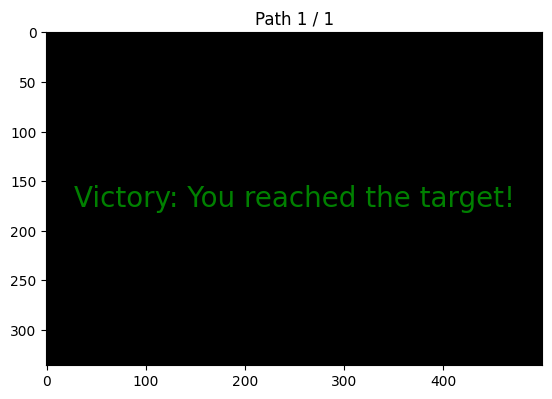

In [47]:
# Iterate over each path in list_paths
for idx, path in enumerate(list_paths):  # 'idx' will be the index (starting from 0)
    try:
        # Set the title to indicate the path number
        plt.title(f"Path {idx + 1} / {len(list_paths)}")  # Index starts from 0, so we add 1 to make it human-readable

        # Reset dell'ambiente per ogni nuovo percorso
        env.seed(SEED)
        state = env.reset()  # Reset dell'ambiente
        game_map = state['chars']
        game = state['pixel']
        game_stats = state['blstats']
        game_mex = state['message']
        
        # Posiziona il giocatore allo start ogni volta
        player_location = get_player_location(game_map)
        target_location = get_target_location(game_map)

        # Convert the path to actions (if necessary)
        actions = actions_from_path(start, path[1:])

        # Visualize the current path
        image = plt.imshow(game[:coordinates[0], :coordinates[1]])
        for action in actions:
            s, _, done, _ = env.step(action)  # `done` tells us if the simulation is over
            image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])

            # If the simulation is over
            if done:
                # Check if the player is dead
                if hp == 0:
                    display_game_over()
                else:
                    display_victory()
                break  # Stop the simulation for the current path

            # Update the game visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    except Exception as e:
        continue